# 2019-yil uchun "Ayna Sultanova" supermarketidagi savdo holati

In [1]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [63]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/Ayna%20Sultanova.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,PAP STAR HAVA XORTUMLARI METAL ART.19460,Bayram uchun aksessuarlar,3.18,2019-10-03,True
1,YUMOS 1LT BAHAR TAZELIGI PALTAR UCUN,"Yuvish vositalari, tozalagichlar",3.95,2019-10-03,True
2,LOKUM ACHACHI PAKET CEVIZLI KG,Shirinliklar,3.90,2019-10-03,True
3,FINIST 500ML ARAQ SUPREME,Aroq,42.60,2019-01-28,False
4,MOHOBBAT 800GR BULQUR POSET,Donli mahsulotlar,1.70,2019-01-28,False
5,LOKUM ACHACHI PAKET CEVIZLI KG,Shirinliklar,3.90,2019-01-28,False
6,VESTA 150GR KELLE QEND,Shirinliklar,0.50,2019-01-28,False
7,ULKER ICIM 100GR PUDING SOKOLADLI,Ziravorlar,0.65,2019-01-28,False
8,VANISH 3*1 SAMPUN LIMONLU XALCA UCUN 450,"Yuvish vositalari, tozalagichlar",5.45,2019-01-28,False
9,AGUSA 100GR KESMIK ARMUD USAQ 3.9%,Tvorog,1.33,2019-01-28,False


In [64]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20475 entries, 0 to 20474
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   20475 non-null  object 
 1   mahsulot_turi   20475 non-null  object 
 2   mahsulot_narhi  20475 non-null  float64
 3   sotilgan_vaqti  20475 non-null  object 
 4   bonus_karta     20475 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 660.0+ KB


In [65]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [66]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20475 entries, 0 to 20474
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   20475 non-null  object        
 1   mahsulot_turi   20475 non-null  object        
 2   mahsulot_narhi  20475 non-null  float64       
 3   sotilgan_vaqti  20475 non-null  datetime64[ns]
 4   bonus_karta     20475 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 660.0+ KB


In [67]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

1817
1904
2187
1915
2056
1937
2204
2321
2000
2121
13
0


In [68]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

1817
1904
2187
1915
2056
1937
2204
2321
2000
2121
0
0


In [69]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,PAP STAR HAVA XORTUMLARI METAL ART.19460,Bayram uchun aksessuarlar,3.18,2019-10-03,True
1,YUMOS 1LT BAHAR TAZELIGI PALTAR UCUN,"Yuvish vositalari, tozalagichlar",3.95,2019-10-03,True
2,LOKUM ACHACHI PAKET CEVIZLI KG,Shirinliklar,3.90,2019-10-03,True
3,FINIST 500ML ARAQ SUPREME,Aroq,42.60,2019-01-28,False
4,MOHOBBAT 800GR BULQUR POSET,Donli mahsulotlar,1.70,2019-01-28,False
...,...,...,...,...,...
20470,MAGIC BASKET MB-009 (L) QULP,Idish-tovoq,16.30,2019-04-11,True
20471,LAYS 150GR CIPS DONER,Quritilgan mevalar to'plami,2.20,2019-04-11,True
20472,HEINZ 350GR KETCUP DLA STEYKA POSET,Souslar,2.30,2019-09-20,True
20473,LINA 60GR KUKURUZ SADE,Shirinliklar,0.70,2019-09-20,True


In [70]:
#9 2019-yilda "Ayna Sultanova" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4756
Maishiy buyumlar,1135
"Yuvish vositalari, tozalagichlar",1028
Mevali sharbatlar,979
Idish-tovoq,779
...,...
Suzma,20
Tayyor ovqatlar,14
Shampan,10
Muzlatilgan mahsulotlar,9


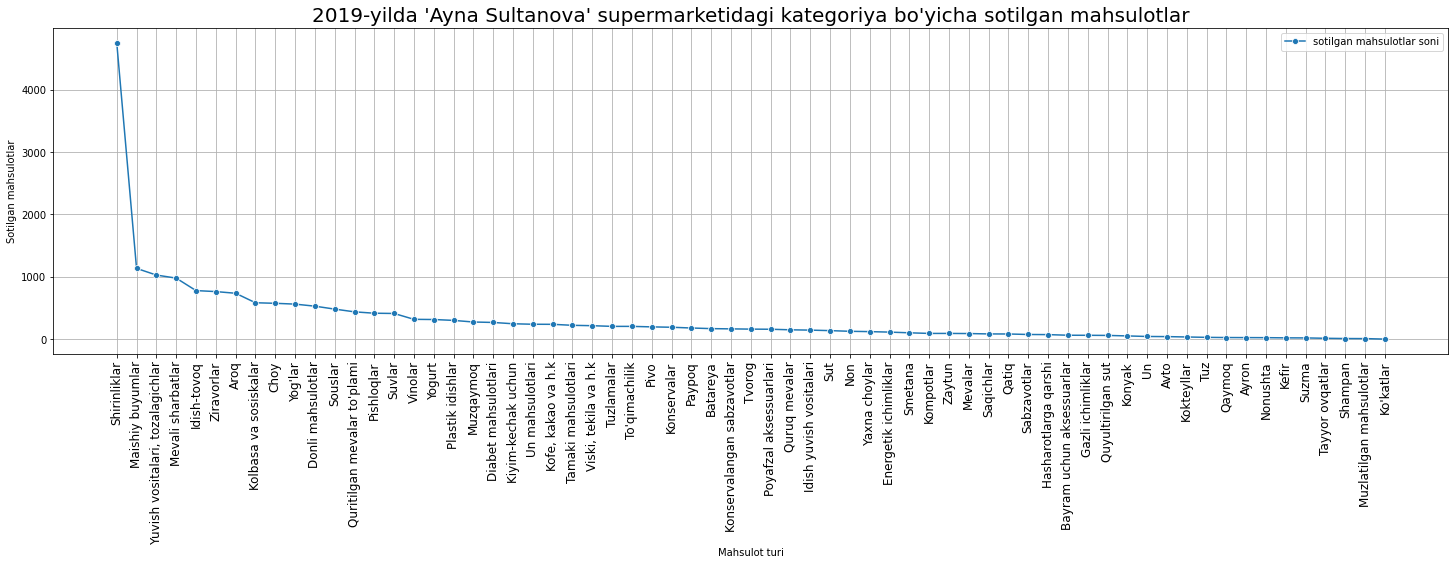

In [71]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'Ayna Sultanova' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [72]:
#10 2019-yilda "Ayna Sultanova" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,11335.25
Avto,203.81
Ayron,17.98
Batareya,654.32
Bayram uchun aksessuarlar,189.30
...,...
Yog'lar,5113.80
Yogurt,399.82


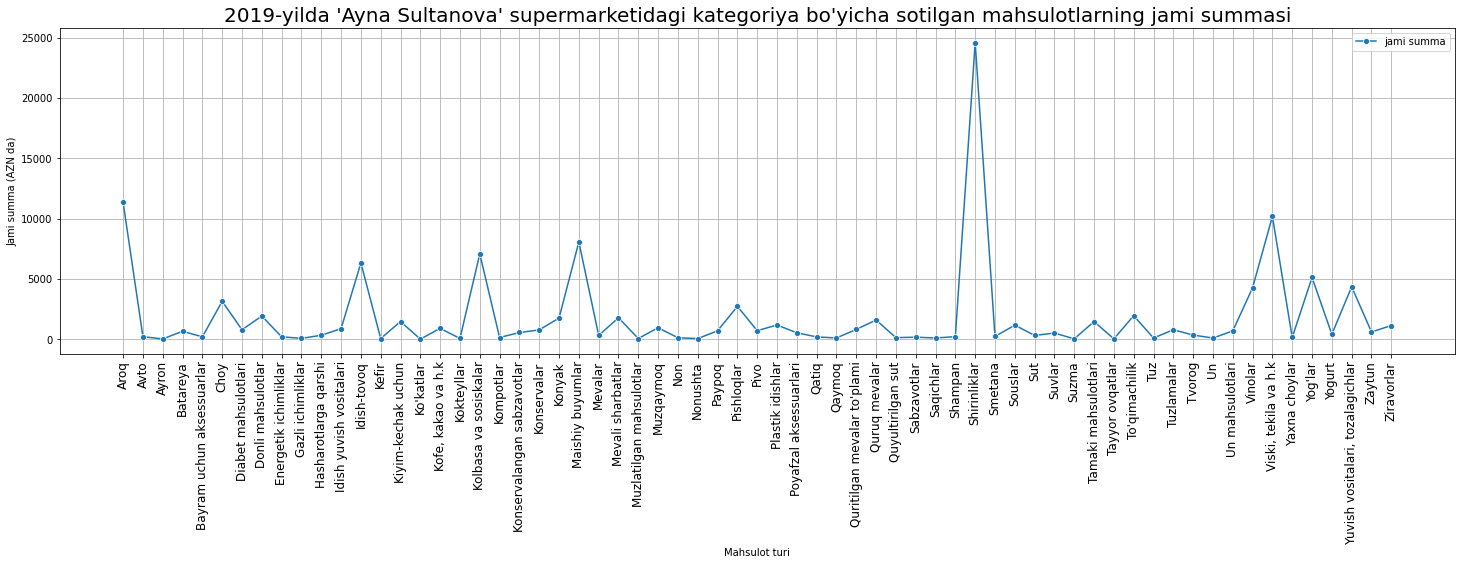

In [73]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'Ayna Sultanova' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [74]:
#11 2019-yilda "Ayna Sultanova" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10359,10103


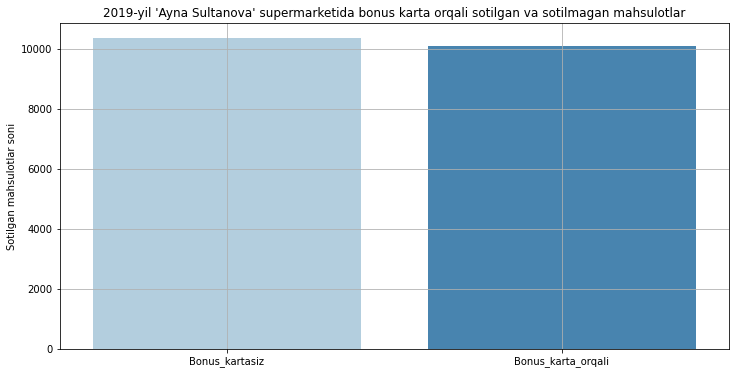

In [75]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'Ayna Sultanova' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [76]:
#12 2019-yilda "Ayna Sultanova" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,1817
Fevral,1904
Mart,2187
Aprel,1915
May,2056
Iyun,1937
Iyul,2204
Avgust,2321
Sentabr,2000
Oktabr,2121


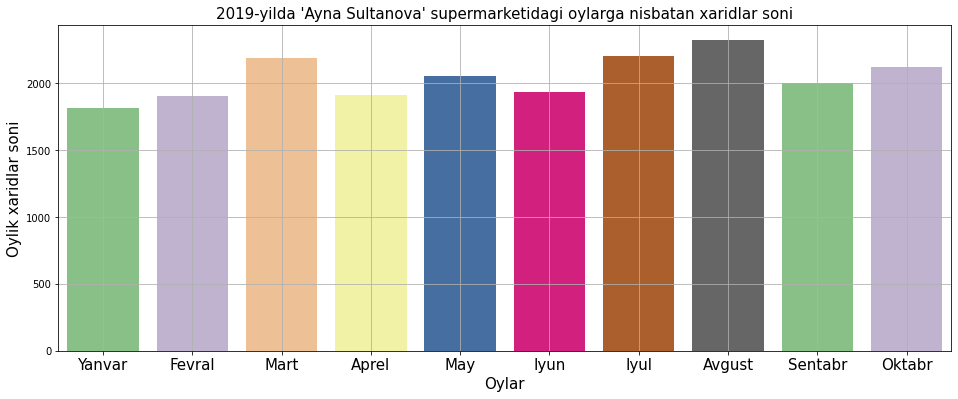

In [77]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'Ayna Sultanova' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [78]:
#13 2019-yilda "Ayna Sultanova" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,2930
Seshanba,3051
Chorshanba,2723
Payshanba,3046
Juma,2829
Shanba,3028
Yakshanba,2855


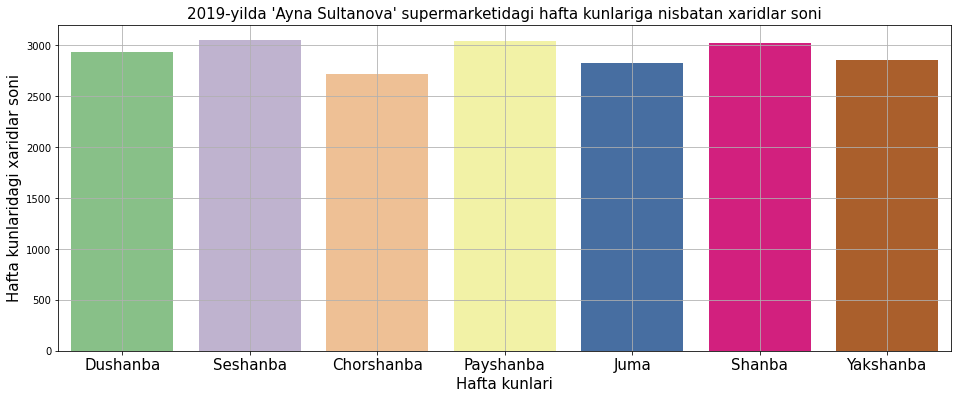

In [79]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'Ayna Sultanova' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [80]:
#14 2019-yilda "Ayna Sultanova" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,692
2,626
3,673
4,706
5,635
6,715
7,679
8,691
9,667
10,679


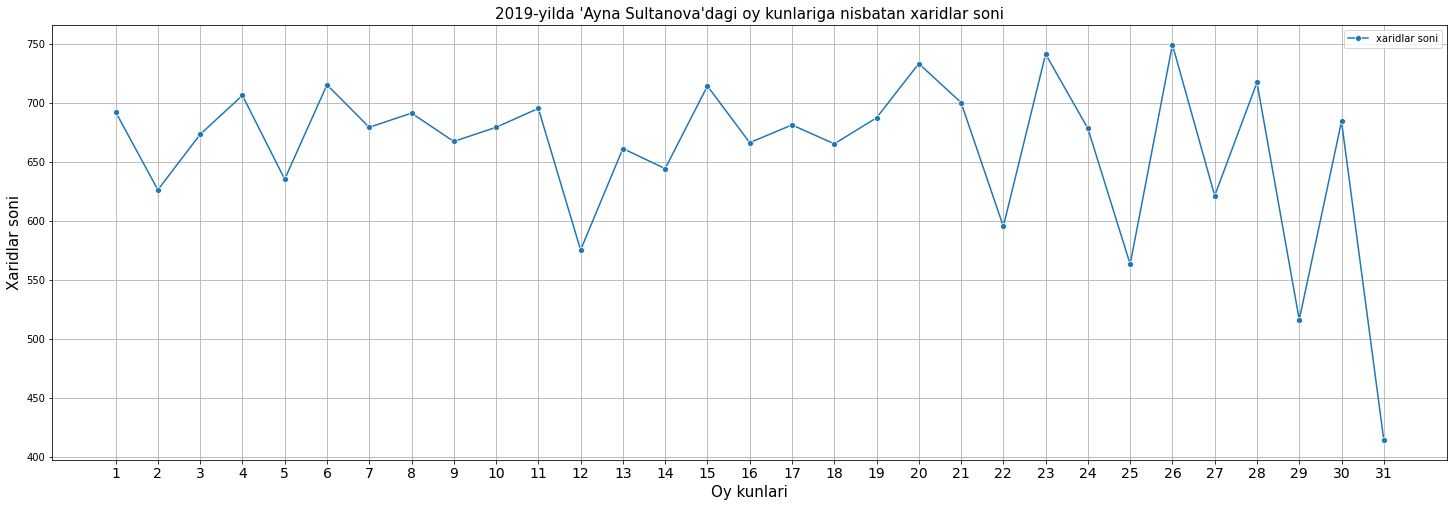

In [81]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'Ayna Sultanova'dagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [82]:
#15 2019-yil 'Ayna Sultanova' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [83]:
len(oy_sanalari)

310

In [84]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [85]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [86]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,52,44,74,53,58,55,52,71,48,52,54,73,48,70,90,47,102,58,48,58,57,26,73,97,24,84,63,54,42,49,41
Fevral,56,62,63,63,86,88,79,55,115,51,73,41,44,51,57,87,55,78,130,61,40,73,71,62,76,66,28,93,0,0,0
Mart,136,43,81,59,36,78,58,80,59,83,93,84,67,51,35,58,35,53,76,61,88,36,72,81,21,89,108,81,71,86,128
Aprel,28,89,68,86,83,80,92,65,56,30,58,77,61,46,58,40,58,75,30,108,42,83,54,31,48,77,53,76,89,74,0
May,45,59,58,84,29,52,66,69,70,73,76,56,85,67,72,95,99,13,83,78,57,76,86,63,35,87,79,65,46,69,64
Iyun,36,60,36,67,72,41,55,78,32,33,81,33,91,63,38,66,80,82,69,54,97,77,104,94,51,60,110,48,52,77,0
Iyul,91,79,79,60,50,103,94,72,60,65,76,53,74,100,76,97,49,84,66,110,63,48,48,75,60,62,47,75,89,72,27
Avgust,71,70,111,47,53,125,72,79,59,89,54,52,50,66,94,40,79,111,68,110,84,54,97,65,49,81,55,95,74,86,81
Sentabr,103,46,56,64,88,57,60,79,71,122,65,41,61,70,98,100,75,53,53,41,74,50,95,44,78,47,45,53,18,93,0
Oktabr,74,74,47,123,80,36,51,43,97,81,65,65,80,60,96,36,49,58,64,52,98,72,41,66,121,96,33,77,35,78,73


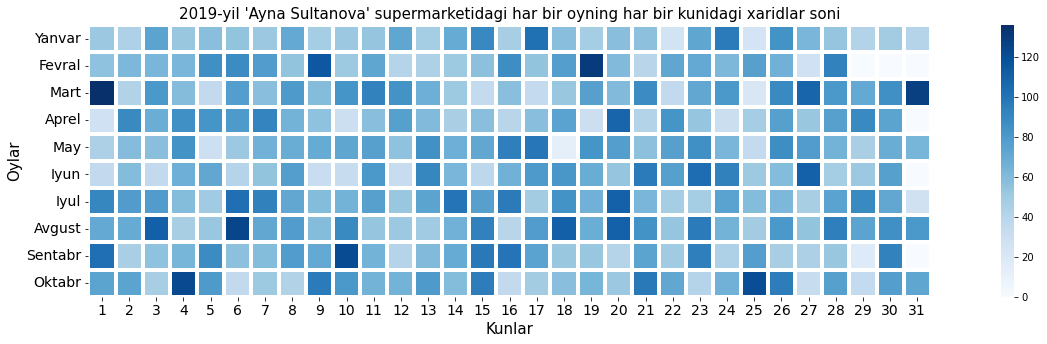

In [89]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'Ayna Sultanova' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

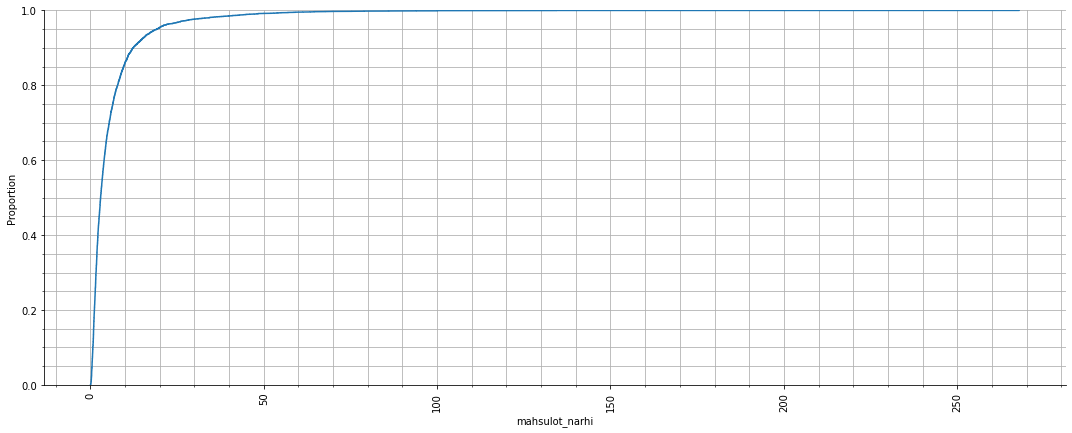

In [88]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 12 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()